In [340]:
import pandas as pd
import numpy as np

In [341]:
df=pd.read_csv("Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [342]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [343]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [344]:
#checking the columns
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [345]:
#checking the shape 
df.shape

(397, 6)

In [346]:
#checking the null values
False==0

True

In [347]:
True==1

True

In [348]:
#boolean value 
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [349]:
#summing the null values in the columns
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [350]:
#total number of the null values in the entire data
df.isnull().sum().sum()

0

In [351]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == 'object': df[i] = enc.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500


<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

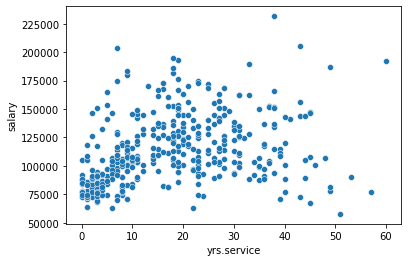

In [352]:
import seaborn as sns

# salary is the target column
sns.scatterplot(x="yrs.service", y="salary", data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

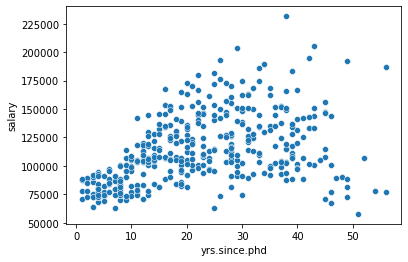

In [353]:
sns.scatterplot(x="yrs.since.phd", y="salary", data=df)

<AxesSubplot:xlabel='rank', ylabel='salary'>

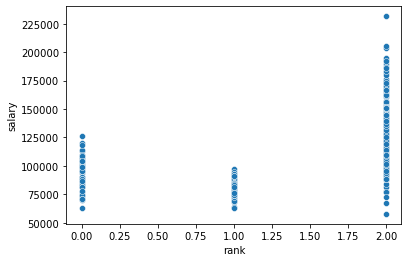

In [354]:
sns.scatterplot(x="rank", y="salary", data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

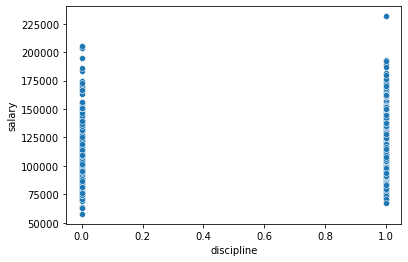

In [355]:
sns.scatterplot(x="discipline", y="salary", data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

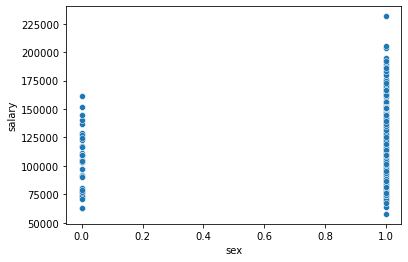

In [356]:
sns.scatterplot(x="sex", y="salary", data=df)

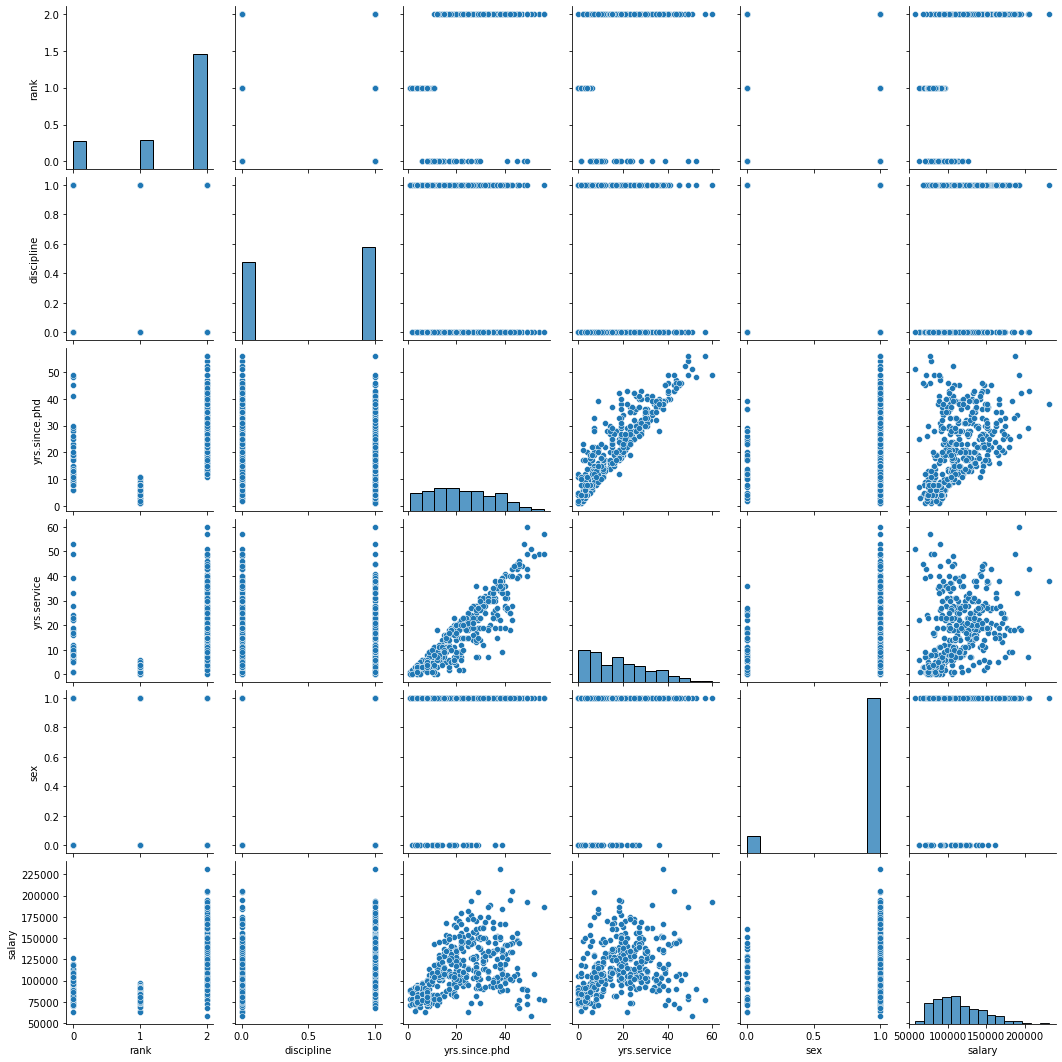

In [357]:
sns.pairplot(df)

In [358]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [359]:
# calculating the matrix for the target column
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

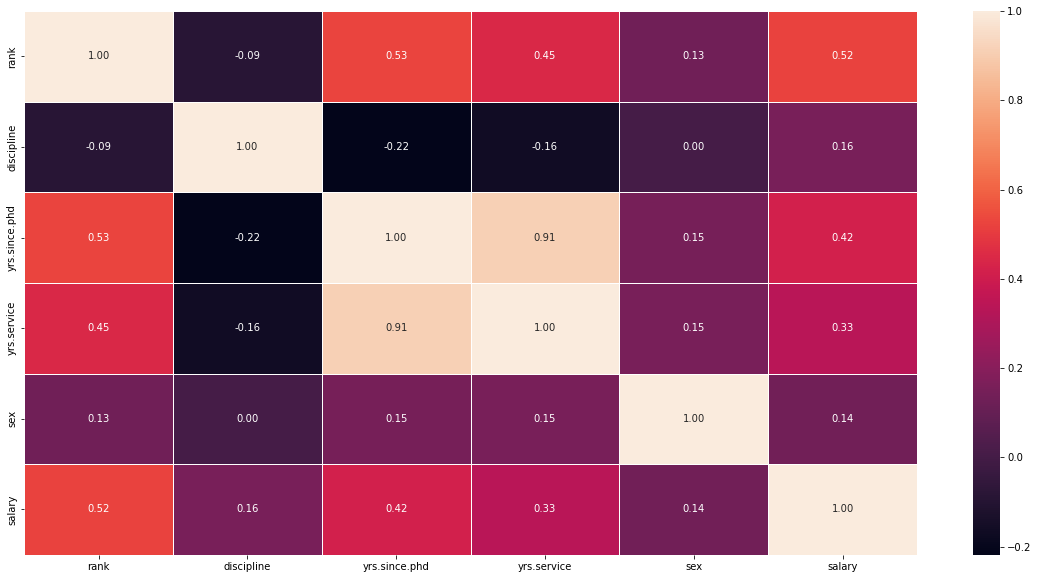

In [360]:
# using the heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="white", fmt='.2f')

plt.savefig('heatmap1.png')
plt.show()

In [361]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == 'object': df[i] = enc.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500


In [362]:
# starting descriptive statistics

In [363]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [364]:
round(df.describe()[1:].transpose(), 3)

,mean,std,min,25%,50%,75%,max
rank,1.509,0.757,0.0,1.0,2.0,2.0,2.0
discipline,0.544,0.499,0.0,0.0,1.0,1.0,1.0
yrs.since.phd,22.315,12.887,1.0,12.0,21.0,32.0,56.0
yrs.service,17.615,13.006,0.0,7.0,16.0,27.0,60.0
sex,0.902,0.298,0.0,1.0,1.0,1.0,1.0
salary,113706.458,30289.039,57800.0,91000.0,107300.0,134185.0,231545.0


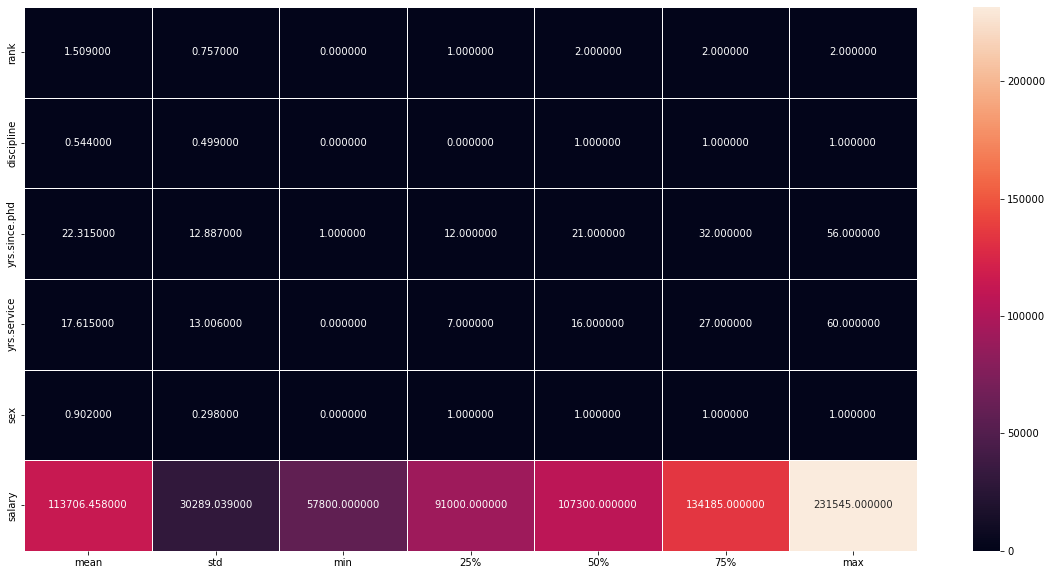

In [365]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

sns.heatmap(round(df.describe()[1:].transpose(), 3), annot=True, linewidths=0.5, linecolor="white", fmt='f')

plt.savefig('heatmap2.png')
plt.show()

In [366]:
# datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    int64  
 4   sex            397 non-null    float64
 5   salary         397 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.7 KB


In [367]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


rank                 AxesSubplot(0.125,0.71587;0.352273x0.16413)
discipline        AxesSubplot(0.547727,0.71587;0.352273x0.16413)
yrs.since.phd       AxesSubplot(0.125,0.518913;0.352273x0.16413)
yrs.service      AxesSubplot(0.547727,0.518913;0.352273x0.16413)
sex                 AxesSubplot(0.125,0.321957;0.352273x0.16413)
salary           AxesSubplot(0.547727,0.321957;0.352273x0.16413)
dtype: object

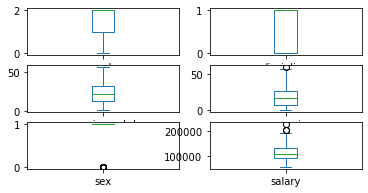

In [368]:
# checking outliers
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

df.plot(kind='box',subplots=True, layout=(4,2))

In [369]:
column_list=df.columns.values
number_of_columns=30
number_of_rows=14

In [370]:
column_list

array(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex',
       'salary'], dtype=object)

In [371]:
#checking the skewness
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

<AxesSubplot:xlabel='salary', ylabel='Density'>

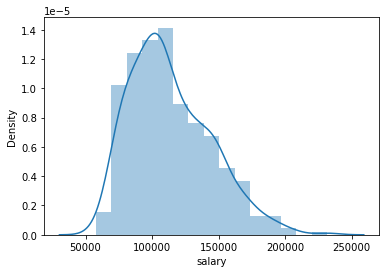

In [372]:
#starting with normal distribution
sns.distplot(df['salary'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

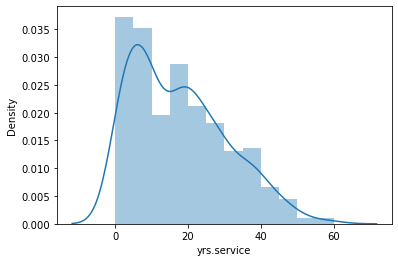

In [373]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='rank', ylabel='Density'>

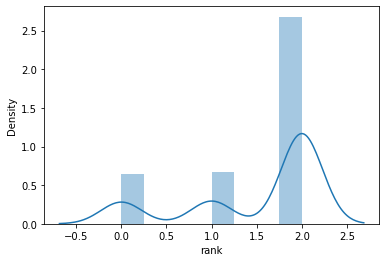

In [374]:
sns.distplot(df['rank'])

<AxesSubplot:xlabel='sex', ylabel='Density'>

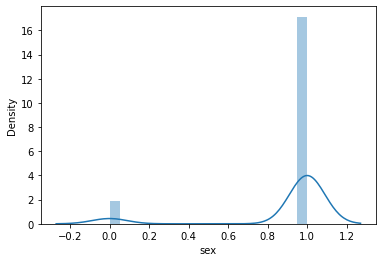

In [375]:
sns.distplot(df['sex'])

In [376]:
# starting with data cleaning

In [377]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

In [378]:
delete=pd.DataFrame([["0.138610", "sex", "no", "alot"]],
                    columns=["correlation with the target","column name","normalised","outliers"])
delete

,correlation with the target,column name,normalised,outliers
0,0.138610,sex,no,alot


In [379]:
df=df.drop(["sex"],axis=1)
df

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2.0,1.0,19,18,139750
1,2.0,1.0,20,16,173200
2,1.0,1.0,4,3,79750
3,2.0,1.0,45,39,115000
4,2.0,1.0,40,41,141500
...,...,...,...,...,...
392,2.0,0.0,33,30,103106
393,2.0,0.0,31,19,150564
394,2.0,0.0,42,25,101738
395,2.0,0.0,25,15,95329


In [380]:
#removing the outliers

In [381]:
from scipy.stats import zscore
np.abs(zscore(df))

,rank,discipline,yrs.since.phd,yrs.service,salary
0,0.649257,0.915403,0.257550,0.029669,0.860919
1,0.649257,0.915403,0.179854,0.124300,1.966672
2,0.672564,0.915403,1.422982,1.125098,1.122495
3,0.649257,0.915403,1.762533,1.646343,0.042760
4,0.649257,0.915403,1.374055,1.800312,0.918768
...,...,...,...,...,...
392,0.649257,1.092415,0.830187,0.953483,0.350418
393,0.649257,1.092415,0.674796,0.106654,1.218396
394,0.649257,1.092415,1.529446,0.568560,0.395640
395,0.649257,1.092415,0.208623,0.201284,0.607502


In [382]:
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 5)

In [383]:
threshold=3
print(np.where(z>3))

len(np.where(z>3)[0])

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))


4

In [384]:
df.drop([43, 131, 330, 364],axis=0)

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2.0,1.0,19,18,139750
1,2.0,1.0,20,16,173200
2,1.0,1.0,4,3,79750
3,2.0,1.0,45,39,115000
4,2.0,1.0,40,41,141500
...,...,...,...,...,...
392,2.0,0.0,33,30,103106
393,2.0,0.0,31,19,150564
394,2.0,0.0,42,25,101738
395,2.0,0.0,25,15,95329


In [385]:
df=df[(z<3).all(axis=1)]
df

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2.0,1.0,19,18,139750
1,2.0,1.0,20,16,173200
2,1.0,1.0,4,3,79750
3,2.0,1.0,45,39,115000
4,2.0,1.0,40,41,141500
...,...,...,...,...,...
392,2.0,0.0,33,30,103106
393,2.0,0.0,31,19,150564
394,2.0,0.0,42,25,101738
395,2.0,0.0,25,15,95329


In [386]:
#x contains the independent variables
x=df.iloc[:,:-1]

#y contains the target variable
y=df.iloc[:,-1]

In [387]:
x.head()

,rank,discipline,yrs.since.phd,yrs.service
0,2.0,1.0,19,18
1,2.0,1.0,20,16
2,1.0,1.0,4,3
3,2.0,1.0,45,39
4,2.0,1.0,40,41


In [388]:
y.head()

0    139750
1    173200
2     79750
3    115000
4    141500
Name: salary, dtype: int64

In [389]:
x.shape

(393, 4)

In [390]:
y.shape

(393,)

In [391]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [392]:
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [393]:
from sklearn.preprocessing import StandardScaler

#converting the dataset into standard normal distribution
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [394]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [395]:
#loading the algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [396]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=44)

In [397]:
x_train.shape

(263, 4)

In [398]:
y_train.shape

(263,)

In [399]:
x_test.shape

(130, 4)

In [400]:
y_test.shape

(130,)

In [401]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [402]:
lr.intercept_

112839.40179072611

In [403]:
lr.coef_

array([14241.76776736,  6978.54812995, 12180.82193579, -7689.75780259])

In [404]:
lr.score(x_train,y_train)

0.4204152826193812

In [405]:
pred=lr.predict(x_test)
print("predicted outcome ",pred)
print('actual outcome',y_test)

predicted outcome  [ 98660.49854297 122745.45431642 120017.14227901 120930.49968588
 122307.03378758  77745.00228981 124243.98745894 131140.39775115
 118336.03094152 141249.75575326 122281.53728825 135300.57872282
  86017.74538706 137618.31213832  78333.32546972 124686.63816906
 129796.59364088 111851.62221159  92202.63141463 125557.83498782
 127662.10611799 114320.75929156  76603.54495917 137307.32570581
  89095.41830567  94508.89463673  84616.89763982 132369.68017917
 124686.63816906 134015.16272069 126832.20877991 112398.73136915
 131497.28333863 115749.42363004  81440.04749472 121644.54289378
 110889.92438091  95464.47413812  92732.36941345 112615.90714013
  89095.41830567 117636.33194171 123746.70808938 126913.99700675
 114044.86512326  97840.24951627 103280.71647619 129286.27215546
 131497.28333863 115749.42363004 120903.42563648 122718.55227001
 117195.03663851 112027.33521957 122381.75322302 124596.8109586
  88331.77650926 124243.98745894 125966.20610981 132744.03847949
  93998

In [406]:
print('error - ')
print('mean absolute error - ',mean_absolute_error(y_test,pred))
print('mean squared error - ',mean_squared_error(y_test,pred))
print('root mean squared error - ',np.sqrt(mean_squared_error(y_test,pred)))
print('r_2 score - ',r2_score(y_test,pred))

error - 
mean absolute error -  17769.8453972219
mean squared error -  498902872.08803874
root mean squared error -  22336.1337766418
r_2 score -  0.42061352004802344


In [407]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

0.962970523175513

In [408]:
predr=dtr.predict(x_test)
print("predicted outcome ",predr)
print('actual outcome',y_test)

predicted outcome  [ 88825.   150917.    81700.   127257.5   67559.    74830.   111512.
 101000.   125192.    57800.   204000.   146856.    78500.   142023.
  83850.   130664.   107500.   103700.    90971.   104800.   140096.
 113068.    74830.   165000.   113600.   105350.    97000.   140310.
 130664.   145098.   134778.    96938.   181257.   115800.    72750.
  67559.   104350.    80225.    92350.   126882.   113600.   134690.
 194800.   168635.   148800.    95611.    74155.   189409.   181257.
 115800.   101036.   109954.    93000.   148800.   131950.   130925.
  70700.   111512.    57800.   140310.    83558.25 127257.5  117704.
 130925.   145098.   105350.   116518.   106294.   175000.   101036.
 181257.   102600.    57800.    74692.    77517.5  181257.   121200.
 161101.   100102.   104800.    92000.    71350.   161101.    70700.
  96545.   166605.   162150.    88175.   109646.    86250.    67559.
  73300.    70768.   100938.    92000.   165000.   131950.   101299.
 113600.    798

In [409]:
print('error - ')
print('mean absolute error - ',mean_absolute_error(y_test,predr))
print('mean Ssquared error - ',mean_squared_error(y_test,predr))
print('root mean squared error - ',np.sqrt(mean_squared_error(y_test,predr)))
print('r_2 score - ',r2_score(y_test,predr))

error - 
mean absolute error -  24075.671153846153
mean Ssquared error -  1036986295.5120193
root mean squared error -  32202.271589315238
r_2 score -  -0.204274164629636


In [410]:
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
knr.score(x_train,y_train)

0.6281454619934101

In [411]:
predknr=knr.predict(x_test)
print("predicted result ",predknr)
print('actual result',y_test)

predicted result  [ 83127.2 141054.2 100745.8 126444.8 102790.6  88830.6 135919.  148814.
 115670.4 118123.  117767.8 118123.   76267.  124101.6  89180.8 121765.2
 117704.4 104917.   89554.2 127340.8 135748.  104448.8  88830.6 142365.6
  98955.2  99812.4 102466.4 127161.2 121765.2 144165.8 130551.2 101749.8
 150877.8 126635.8  73700.  102790.6 112972.   84259.4  89830.  122978.6
  98955.2 109711.8 121908.2 145216.  112673.6 101235.   79370.2 153674.2
 150877.8 126635.8 127260.2 109584.2 108730.  114265.  124363.8 127089.4
  73160.  135919.   94143.4 132623.   83322.4 116774.8 147470.2 124199.4
 125163.  100862.4 127047.2 110750.4 125027.  110130.6 146397.8 117255.8
  94143.4  88386.6  76267.  150877.8 126624.4 146254.   89000.4 127340.8
  83770.   75247.  155391.6  76277.  132795.6 154320.8 155079.6 117039.2
 114233.6 106144.2 102790.6  78907.   85095.8  96422.8  85404.  140614.6
 113246.  101041.8  98955.2  79370.2  73700.  155079.6 157935.  110168.8
  74000.  127922.2 138485.   76267

In [412]:
print('error - ')
print('mean absolute - ',mean_absolute_error(y_test,predknr))
print('mean squared error - ',mean_squared_error(y_test,predknr))
print('root mean squared error - ',np.sqrt(mean_squared_error(y_test,predknr)))
print('r_2 score - ',r2_score(y_test,predknr))

error - 
mean absolute -  16653.35230769231
mean squared error -  523929761.4852308
root mean squared error -  22889.51204122165
r_2 score -  0.39154926292859804


In [413]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

-0.028991197007036007

In [414]:
svp=SVR(kernel='poly')
svp.fit(x_train,y_train)
svp.score(x_train,y_train)

-0.028653310073450733

In [415]:
svl=SVR(kernel='poly')
svl.fit(x_train,y_train)
svl.score(x_train,y_train)

-0.028653310073450733

In [418]:
from sklearn.model_selection import cross_val_score
j=[lr,dtr,knr,svr]
for n in j:
    print('cross_valid_score - ',n,'-')
    score=cross_val_score(n,x,y,cv=6)
    print(score)
    print(score.mean())
    print(score.std())

cross_valid_score -  LinearRegression() -
[0.32068983 0.51823966 0.41472994 0.40814311 0.24836014 0.36247348]
0.3787726919349537
0.08391791484158788
cross_valid_score -  DecisionTreeRegressor() -
[-0.04859605  0.25004966  0.25299301 -0.18028072  0.02867654 -0.50754706]
-0.03411743612741532
0.2623087801176165
cross_valid_score -  KNeighborsRegressor() -
[0.29392768 0.43878182 0.47674851 0.38114478 0.31459909 0.27711337]
0.36371920887320486
0.07471934494141944
cross_valid_score -  SVR() -
[-0.00119103 -0.00313292 -0.1245667  -0.01696764 -0.05204068 -0.22520958]
-0.070518090707401
0.08104193887325291


In [419]:
from sklearn.model_selection import KFold
j=[lr,dtr,knr,svr]
for n in j:
    print('k_fold',n,'-')
    Kfold=KFold(5)
    score=cross_val_score(n,x,y,cv=Kfold)
    print(score)
    print(score.mean())
    print(score.std())

k_fold LinearRegression() -
[0.24849052 0.57491121 0.41012385 0.26059421 0.31281385]
0.3613867271274098
0.12102232863596532
k_fold DecisionTreeRegressor() -
[-0.3123711   0.2684247   0.09854135 -0.13249779 -0.55465801]
-0.12651216722381342
0.291380318170232
k_fold KNeighborsRegressor() -
[0.11313965 0.59811954 0.40137383 0.27563485 0.28285208]
0.3342239876516308
0.1606860336749838
k_fold SVR() -
[ 0.00158844 -0.00698975 -0.12816237 -0.00413057 -0.2510532 ]
-0.07774949026333819
0.0992943385367589


In [421]:
import pickle
filename='salary.pkl'
pickle.dump(lr,open(filename,'wb'))